In [126]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

# [Step 3] 머신러닝 모델링1

#### **<span style="color:blue">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [127]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩

x_train = pd.read_csv('train_x.csv')
y_train = pd.read_csv('train_y.csv')

x_test = pd.read_csv('test_x.csv')
y_test = pd.read_csv('test_y.csv')

In [128]:
x_train.head()

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),...,시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),month,day,hour,PM10_lag1
0,0.003,0.6,0.002,0.039,31.0,18.0,19.2,0.0,1.3,360.0,...,2000,17.8,22.3,22.3,22.7,22.9,10,1,0,0.0
1,0.003,0.6,0.002,0.035,27.0,16.0,18.7,0.0,1.0,20.0,...,2000,17.4,22.1,22.0,22.5,22.9,10,1,1,0.0
2,0.003,0.6,0.002,0.033,28.0,18.0,18.3,0.0,0.3,0.0,...,2000,17.2,21.8,21.8,22.4,22.8,10,1,2,0.0
3,0.003,0.6,0.002,0.030,26.0,16.0,17.7,0.0,2.0,20.0,...,2000,17.0,21.6,21.6,22.2,22.8,10,1,3,0.0
4,0.003,0.5,0.003,0.026,26.0,16.0,17.4,0.0,1.0,50.0,...,2000,16.5,21.3,21.4,22.0,22.7,10,1,4,0.0


In [129]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SO2            2160 non-null   float64
 1   CO             2160 non-null   float64
 2   O3             2160 non-null   float64
 3   NO2            2160 non-null   float64
 4   PM10           2160 non-null   float64
 5   PM25           2160 non-null   float64
 6   기온(°C)         2160 non-null   float64
 7   강수량(mm)        2160 non-null   float64
 8   풍속(m/s)        2160 non-null   float64
 9   풍향(16방위)       2160 non-null   int64  
 10  습도(%)          2160 non-null   int64  
 11  증기압(hPa)       2160 non-null   float64
 12  이슬점온도(°C)      2160 non-null   float64
 13  현지기압(hPa)      2160 non-null   float64
 14  해면기압(hPa)      2160 non-null   float64
 15  일조(hr)         2160 non-null   float64
 16  일사(MJ/m2)      2160 non-null   float64
 17  적설(cm)         2160 non-null   float64
 18  3시간신적설(c

---

#### **<span style="color:blue">[3-2] 모델링: LinearRegression</span>**

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [130]:
# LinearRegression 코드를 작성하세요.

model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

LinearRegression()

In [131]:
# predict로 예측하여 y_pred_LR에 저장해보세요.

y_pred_LR = model_LR.predict(x_test)

In [132]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.

print('MSE:', mse(y_test, y_pred_LR))
print('R2:', r2_score(y_test, y_pred_LR))

MSE: 36.89727885833468
R2: 0.9333068710673269


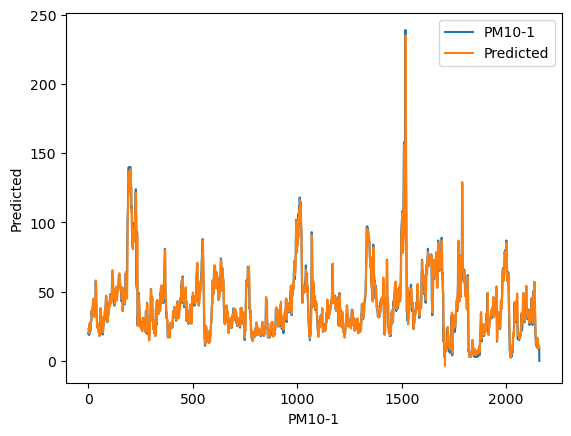

In [133]:
import matplotlib.pyplot as plt
plt.plot(y_test.values, label = 'PM10-1')
plt.plot(y_pred_LR, label = 'Predicted')
plt.legend()
plt.xlabel('PM10-1')
plt.ylabel('Predicted')
plt.show()

In [134]:
# 학습한 모델을 pkl 파일로 저장해보세요.




# [Step 4] 머신러닝 모델링2

#### **<span style="color:blue">(선택 수행)[4-1] 모델링: 랜덤포레스트</span>**

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [135]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, n_estimators = 100, random_state=1)
model_rf.fit(x_train, y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_20168\3363845813.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=5, random_state=1)

In [136]:
# Test 데이터로 성능을 평가해보세요.
y_pred_LR = model_rf.predict(x_test)

print('MSE:', mse(y_test, y_pred_LR))
print('R2:', r2_score(y_test, y_pred_LR))

MSE: 39.113319986354156
R2: 0.9293012988071458


In [137]:
model.score(x_test, y_test)

0.9192523070391295

In [138]:
# 실제값과 예측값 비교
import numpy as np
a_LR = pd.DataFrame(y_test).copy()
a_LR['1hour_predicted'] = np.round(y_pred_LR, 1)
print(a_LR)

      PM10_1  1hour_predicted
0       20.0             23.9
1       20.0             19.7
2       19.0             19.7
3       24.0             19.7
4       19.0             25.5
...      ...              ...
2155    10.0             13.1
2156    11.0              8.4
2157    11.0             13.1
2158     9.0             13.1
2159     0.0              7.7

[2160 rows x 2 columns]


In [139]:
# 학습한 모델을 파일로 저장해보세요.



In [140]:
# (다음 진행은 선택입니다)
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인


In [141]:
# (선택) 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-2] 모델링: GradientBoosting</span>**

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [142]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=1)
model_gb.fit(x_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=5, random_state=1)

In [143]:
# Test 데이터로 성능을 평가해보세요.
y_pred_gb = model_gb.predict(x_test)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print('R2:', r2_score(y_test, y_pred_gb))

RMSE: 6.035310777055072
R2: 0.9341605747735904


In [144]:
model.score(x_test, y_test)

0.9192523070391295

In [145]:
# 실제값과 예측값 비교
import numpy as np
a_gb = pd.DataFrame(y_test).copy()
a_gb['1hour_predicted'] = np.round(y_pred_gb, 1)
print(a_gb)

      PM10_1  1hour_predicted
0       20.0             23.6
1       20.0             22.0
2       19.0             23.7
3       24.0             21.3
4       19.0             26.6
...      ...              ...
2155    10.0             12.7
2156    11.0             11.0
2157    11.0             11.5
2158     9.0             11.1
2159     0.0             11.2

[2160 rows x 2 columns]


In [146]:
# 학습한 모델을 파일로 저장해보세요.




In [147]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인




In [148]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-3] 모델링: Self Choice Model</span>**

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [149]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

# Decision Tree

# 1단계: 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 2단계: 선언하기
model_DT = DecisionTreeRegressor(max_depth=5, random_state=1)

# 3단계: 학습하기
model_DT.fit(x_train, y_train)

# 4단계: 예측하기
y_pred_DT = model_DT.predict(x_test)

# 5단계 평가하기
print('MAE:', mae(y_test, y_pred_DT))
print('R2:', r2_score(y_test, y_pred_DT))

MAE: 4.448122995305634
R2: 0.9192523070391295


In [150]:
model.score(x_test, y_test)

0.9192523070391295

In [151]:
# 실제값과 예측값 비교
import numpy as np
a_dt = pd.DataFrame(y_test).copy()
a_dt['1hour_predicted'] = np.round(y_pred_DT, 1)
print(a_dt)

      PM10_1  1hour_predicted
0       20.0             25.3
1       20.0             19.8
2       19.0             19.8
3       24.0             19.8
4       19.0             25.3
...      ...              ...
2155    10.0             14.1
2156    11.0              7.6
2157    11.0             14.1
2158     9.0             14.1
2159     0.0              7.6

[2160 rows x 2 columns]


In [157]:
"""
LinearRegression
MSE: 36.89727885833468
R2: 0.9333068710673269

RandomForestRegressor
MSE: 39.113319986354156
R2: 0.9293012988071458

GradientBoosting
RMSE: 6.035310777055072
R2: 0.9341605747735904

DecisionTreeRegressor
MAE: 4.448122995305634
R2: 0.9192523070391295
"""

'\nLinearRegression\nMSE: 36.89727885833468\nR2: 0.9333068710673269\n\nRandomForestRegressor\nMSE: 39.113319986354156\nR2: 0.9293012988071458\n\nGradientBoosting\nRMSE: 6.035310777055072\nR2: 0.9341605747735904\n\nDecisionTreeRegressor\nMAE: 4.448122995305634\nR2: 0.9192523070391295\n'

In [152]:
# Test 데이터로 성능을 평가해보세요.




In [153]:
# 학습한 모델을 파일로 저장해보세요.




In [154]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인



In [155]:
# Feature의 중요도 확인





In [156]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행</span>**

* 위 머신러닝 모델들에 대해 성능 최적화를 진행해보세요.

In [23]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

